# show reconstruct image

In [1]:
import pickle
import yaml
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

In [2]:
########################################################################
# load config
########################################################################
with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [3]:
########################################################################
# Setting I/O path
########################################################################
# input dirs
INPUT_ROOT = config['IO_OPTION']['INPUT_ROOT']
dev_path = INPUT_ROOT + "/dev_data"
add_dev_path = INPUT_ROOT + "/add_dev_data"
eval_path = INPUT_ROOT + "/eval_test"
MODEL_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/models'
# machine type
MACHINE_TYPE = config['IO_OPTION']['MACHINE_TYPE']
machine_types = os.listdir(dev_path)
# output dirs
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
RESULT_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/result'
RECONS_OUTDIR = OUTPUT_ROOT +'/eval_reconstruct_img'
PKL_DIR = OUTPUT_ROOT +'/pkl'
os.makedirs(MODEL_DIR, exist_ok=True)

In [4]:
with open('{}/{}_history.pkl'.format(PKL_DIR, 'valve'), 'rb') as file:
    history = pickle.load(file)

In [5]:
history['reconstruct_img']['input'][0].shape

torch.Size([1, 64, 128, 1])

In [6]:
epoch_num = 6 # * 10

In [7]:
input_img = history['reconstruct_img']['input'][epoch_num][0,:,:,0].to('cpu')
output_img = history['reconstruct_img']['output'][epoch_num][0,:,:,0].to('cpu')

In [8]:
input_img.shape

torch.Size([64, 128])

In [9]:
np.array(F.mse_loss(output_img, input_img))

array(5.29564, dtype=float32)

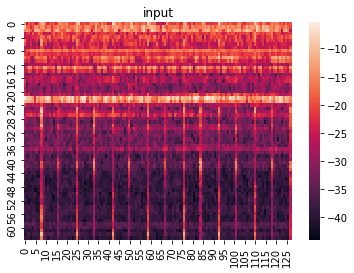

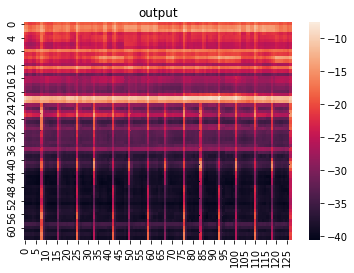

In [10]:
sns.heatmap(input_img)
plt.title('input')
plt.show()
sns.heatmap(output_img)
plt.title('output')
plt.show()

# eval

## import library

In [11]:
########################################################################
# import default python-library
########################################################################
import os
import glob
import csv
import re
import itertools
import sys
from collections import defaultdict
########################################################################


########################################################################
# import additional python-library
########################################################################
import numpy
from sklearn import metrics
import common as com
import pytorch_modeler as modeler
from pytorch_model import CNN6AutoEncoder as Model
import torch.utils.data
import yaml
yaml.warnings({'YAMLLoadWarning': False})
import matplotlib.pyplot as plt
import seaborn as sns
########################################################################
import eval_functions as eval_func

## Setting

In [12]:
########################################################################
# load config
########################################################################
with open("./config.yaml", 'rb') as f:
    config = yaml.load(f)

/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
########################################################################
# Setting seed
########################################################################
modeler.set_seed(42)

In [14]:
########################################################################
# Setting I/O path
########################################################################
# input dirs
INPUT_ROOT = config['IO_OPTION']['INPUT_ROOT']
dev_path = INPUT_ROOT + "/dev_data"
add_dev_path = INPUT_ROOT + "/add_dev_data"
eval_path = INPUT_ROOT + "/eval_test"
MODEL_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/models'
# machine type
MACHINE_TYPE = config['IO_OPTION']['MACHINE_TYPE']
machine_types = os.listdir(dev_path)
# output dirs
OUTPUT_ROOT = config['IO_OPTION']['OUTPUT_ROOT']
RESULT_DIR = config['IO_OPTION']['OUTPUT_ROOT'] + '/result'
RECONS_OUTDIR = OUTPUT_ROOT +'/eval_reconstruct_img'
os.makedirs(MODEL_DIR, exist_ok=True)

In [15]:
########################################################################
# for original function
########################################################################
param = {}
param["dev_directory"] = dev_path
param["eval_directory"] = eval_path
param["model_directory"] = MODEL_DIR
param["result_directory"] = RESULT_DIR
param["result_file"] = 'result.csv'

## run eval

In [16]:
def make_reconstruct_img(x, y, label, file_name):
    fig = plt.figure(figsize=(10,5)) # width, height
    fig.suptitle('label={}'.format(int(label)))
    ax1 = fig.add_subplot(121, title='x') # 明示的にAxesを作成する
    sns.heatmap(x, ax=ax1) # ax1を参照するようにする
    ax2 = fig.add_subplot(122, title='y')
    sns.heatmap(y, ax=ax2)
    fig.savefig('{}.png'.format(file_name))

In [17]:
mode = 'dev'

2020-11-01 20:41:08,314 - INFO - load_directory <- development
2020-11-01 20:41:08,316 - INFO - ===========================
2020-11-01 20:41:08,316 - INFO - [1/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar
2020-11-01 20:41:08,317 - INFO - ============== MODEL LOAD ==============
2020-11-01 20:41:08,928 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_01
2020-11-01 20:41:08,936 - INFO - test_file  num : 601
2020-11-01 20:41:08,937 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:41:16,074 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_ToyCar_id_01.csv
2020-11-01 20:41:16,077 - INFO - AUC : 0.6884462151394423
2020-11-01 20:41:16,078 - INFO - pAUC : 0.5597759338585507
2020-11-01 20:41:16,078 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:41:16,079 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_02
2020-11-01 20:41:16,090 - INFO - test_file  num : 602
2020-11-01 20:41:16,091 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:41:23,237 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_ToyCar_id_02.csv
2020-11-01 20:41:23,241 - INFO - AUC : 0.7180215419501134
2020-11-01 20:41:23,241 - INFO - pAUC : 0.5954171142141067
2020-11-01 20:41:23,242 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:41:23,242 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_03
2020-11-01 20:41:23,252 - INFO - test_file  num : 602
2020-11-01 20:41:23,253 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:41:30,723 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_ToyCar_id_03.csv
2020-11-01 20:41:30,726 - INFO - AUC : 0.5317346938775509
2020-11-01 20:41:30,727 - INFO - pAUC : 0.5222580260174245
2020-11-01 20:41:30,727 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:41:30,727 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyCar_id_04
2020-11-01 20:41:30,736 - INFO - test_file  num : 602
2020-11-01 20:41:30,737 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:41:37,919 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_ToyCar_id_04.csv
2020-11-01 20:41:37,922 - INFO - AUC : 0.6546825396825398
2020-11-01 20:41:37,923 - INFO - pAUC : 0.5567490153956319
2020-11-01 20:41:37,923 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:41:37,924 - INFO - ===========================
2020-11-01 20:41:37,924 - INFO - [2/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor
2020-11-01 20:41:37,925 - INFO - ============== MODEL LOAD ==============
2020-11-01 20:41:38,314 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_01
2020-11-01 20:41:38,332 - INFO - test_file  num : 1181
2020-11-01 20:41:38,335 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:41:43,789 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_ToyConveyor_id_01.csv
2020-11-01 20:41:43,792 - INFO - AUC : 0.5751574803149606
2020-11-01 20:41:43,793 - INFO - pAUC : 0.5142975549108993
2020-11-01 20:41:43,793 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:41:43,794 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_02
2020-11-01 20:41:43,805 - INFO - test_file  num : 1136
2020-11-01 20:41:43,806 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============
/home/hiroki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


2020-11-01 20:41:49,119 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_ToyConveyor_id_02.csv
2020-11-01 20:41:49,312 - INFO - AUC : 0.5790401785714285
2020-11-01 20:41:49,312 - INFO - pAUC : 0.5163494674185464
2020-11-01 20:41:49,313 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:41:49,313 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/ToyConveyor_id_03
2020-11-01 20:41:49,326 - INFO - test_file  num : 1135
2020-11-01 20:41:49,327 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:41:54,719 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_ToyConveyor_id_03.csv
2020-11-01 20:41:54,722 - INFO - AUC : 0.6473698521961976
2020-11-01 20:41:54,723 - INFO - pAUC : 0.5477762773642492
2020-11-01 20:41:54,723 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:41:54,724 - INFO - ===========================
2020-11-01 20:41:54,724 - INFO - [3/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan
2020-11-01 20:41:54,725 - INFO - ============== MODEL LOAD ==============
2020-11-01 20:41:55,352 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_00
2020-11-01 20:41:55,359 - INFO - test_file  num : 489
2020-11-01 20:41:55,360 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:01,006 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_fan_id_00.csv
2020-11-01 20:42:01,009 - INFO - AUC : 0.500745501285347
2020-11-01 20:42:01,010 - INFO - pAUC : 0.49073197131646595
2020-11-01 20:42:01,011 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:01,011 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_02
2020-11-01 20:42:01,019 - INFO - test_file  num : 441
2020-11-01 20:42:01,020 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:06,570 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_fan_id_02.csv
2020-11-01 20:42:06,573 - INFO - AUC : 0.6050733137829912
2020-11-01 20:42:06,574 - INFO - pAUC : 0.5324895817255749
2020-11-01 20:42:06,574 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:06,574 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_04
2020-11-01 20:42:06,581 - INFO - test_file  num : 430
2020-11-01 20:42:06,581 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:11,920 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_fan_id_04.csv
2020-11-01 20:42:11,923 - INFO - AUC : 0.4365757575757576
2020-11-01 20:42:11,924 - INFO - pAUC : 0.5154704944178629
2020-11-01 20:42:11,925 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:11,925 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/fan_id_06
2020-11-01 20:42:11,933 - INFO - test_file  num : 443
2020-11-01 20:42:11,934 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:17,376 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_fan_id_06.csv
2020-11-01 20:42:17,379 - INFO - AUC : 0.7491836734693877
2020-11-01 20:42:17,380 - INFO - pAUC : 0.5372103728709529
2020-11-01 20:42:17,381 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:17,381 - INFO - ===========================
2020-11-01 20:42:17,382 - INFO - [4/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump
2020-11-01 20:42:17,384 - INFO - ============== MODEL LOAD ==============
2020-11-01 20:42:18,098 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_00
2020-11-01 20:42:18,102 - INFO - test_file  num : 237
2020-11-01 20:42:18,103 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:22,085 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_pump_id_00.csv
2020-11-01 20:42:22,089 - INFO - AUC : 0.6743065693430657
2020-11-01 20:42:22,090 - INFO - pAUC : 0.6066077602766039
2020-11-01 20:42:22,091 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:22,092 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_02
2020-11-01 20:42:22,097 - INFO - test_file  num : 205
2020-11-01 20:42:22,098 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:25,497 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_pump_id_02.csv
2020-11-01 20:42:25,500 - INFO - AUC : 0.4465714285714285
2020-11-01 20:42:25,500 - INFO - pAUC : 0.5368421052631579
2020-11-01 20:42:25,501 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:25,501 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_04
2020-11-01 20:42:25,505 - INFO - test_file  num : 194
2020-11-01 20:42:25,506 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:28,745 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_pump_id_04.csv
2020-11-01 20:42:28,750 - INFO - AUC : 0.83
2020-11-01 20:42:28,750 - INFO - pAUC : 0.6578947368421053
2020-11-01 20:42:28,751 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:28,751 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/pump_id_06
2020-11-01 20:42:28,756 - INFO - test_file  num : 196
2020-11-01 20:42:28,757 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:32,082 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_pump_id_06.csv
2020-11-01 20:42:32,086 - INFO - AUC : 0.6284375
2020-11-01 20:42:32,086 - INFO - pAUC : 0.5389254385964912
2020-11-01 20:42:32,087 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:32,087 - INFO - ===========================
2020-11-01 20:42:32,088 - INFO - [5/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider
2020-11-01 20:42:32,089 - INFO - ============== MODEL LOAD ==============
2020-11-01 20:42:32,711 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_00
2020-11-01 20:42:32,717 - INFO - test_file  num : 445
2020-11-01 20:42:32,719 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:36,249 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_slider_id_00.csv
2020-11-01 20:42:36,252 - INFO - AUC : 0.9842608695652174
2020-11-01 20:42:36,253 - INFO - pAUC : 0.9244851258581236
2020-11-01 20:42:36,253 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:36,254 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_02
2020-11-01 20:42:36,258 - INFO - test_file  num : 356
2020-11-01 20:42:36,259 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:39,168 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_slider_id_02.csv
2020-11-01 20:42:39,171 - INFO - AUC : 0.7601171874999999
2020-11-01 20:42:39,172 - INFO - pAUC : 0.6095805921052632
2020-11-01 20:42:39,172 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:39,173 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_04
2020-11-01 20:42:39,179 - INFO - test_file  num : 267
2020-11-01 20:42:39,180 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:41,874 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_slider_id_04.csv
2020-11-01 20:42:41,877 - INFO - AUC : 0.9283233532934132
2020-11-01 20:42:41,878 - INFO - pAUC : 0.739678537661519
2020-11-01 20:42:41,879 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:41,879 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/slider_id_06
2020-11-01 20:42:41,886 - INFO - test_file  num : 178
2020-11-01 20:42:41,886 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:44,324 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_slider_id_06.csv
2020-11-01 20:42:44,327 - INFO - AUC : 0.7032051282051281
2020-11-01 20:42:44,328 - INFO - pAUC : 0.5013495276653172
2020-11-01 20:42:44,329 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:44,330 - INFO - ===========================
2020-11-01 20:42:44,330 - INFO - [6/6] /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve
2020-11-01 20:42:44,331 - INFO - ============== MODEL LOAD ==============
2020-11-01 20:42:44,706 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_00
2020-11-01 20:42:44,710 - INFO - test_file  num : 213
2020-11-01 20:42:44,711 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:47,248 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_valve_id_00.csv
2020-11-01 20:42:47,251 - INFO - AUC : 0.471858407079646
2020-11-01 20:42:47,252 - INFO - pAUC : 0.5048905449464369
2020-11-01 20:42:47,252 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:47,253 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_02
2020-11-01 20:42:47,258 - INFO - test_file  num : 214
2020-11-01 20:42:47,259 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:50,176 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_valve_id_02.csv
2020-11-01 20:42:50,179 - INFO - AUC : 0.6812280701754386
2020-11-01 20:42:50,180 - INFO - pAUC : 0.5535549399815328
2020-11-01 20:42:50,180 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:50,181 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_04
2020-11-01 20:42:50,185 - INFO - test_file  num : 214
2020-11-01 20:42:50,185 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:52,676 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_valve_id_04.csv
2020-11-01 20:42:52,679 - INFO - AUC : 0.627719298245614
2020-11-01 20:42:52,680 - INFO - pAUC : 0.5337026777469991
2020-11-01 20:42:52,680 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:52,681 - INFO - target_dir : /media/hiroki/working/research/dcase2020/datasets/DCASE2/dev_data/valve_id_06
2020-11-01 20:42:52,685 - INFO - test_file  num : 214
2020-11-01 20:42:52,686 - INFO - ============== BEGIN TEST FOR A MACHINE ID ==============


2020-11-01 20:42:55,169 - INFO - anomaly score result ->  /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/anomaly_score_valve_id_06.csv
2020-11-01 20:42:55,172 - INFO - AUC : 0.4357894736842105
2020-11-01 20:42:55,173 - INFO - pAUC : 0.4838411819021237
2020-11-01 20:42:55,173 - INFO - ============ END OF TEST FOR A MACHINE ID ============
2020-11-01 20:42:55,174 - INFO - AUC and pAUC results -> /media/hiroki/working/research/dcase2020/result/2D/CONV_AE2/result/result.csv


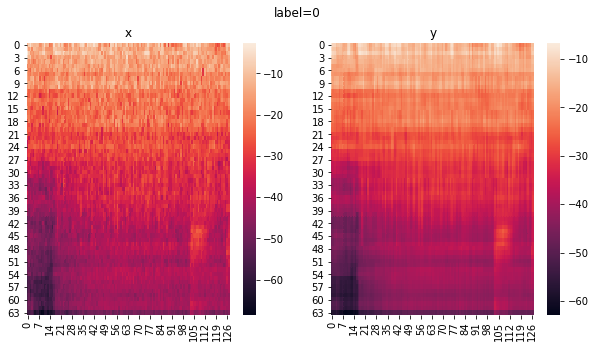

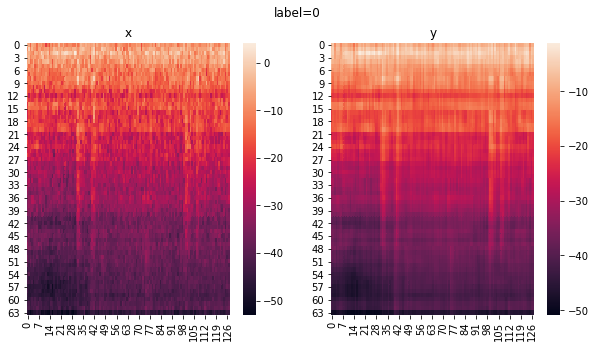

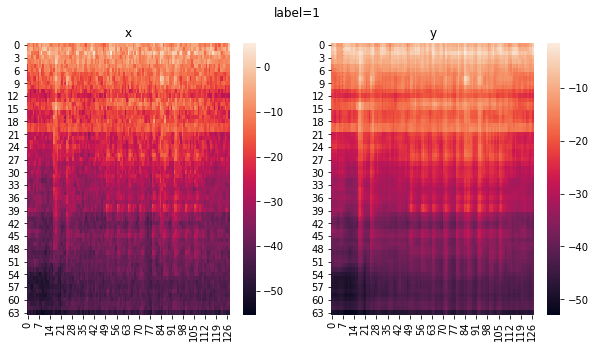

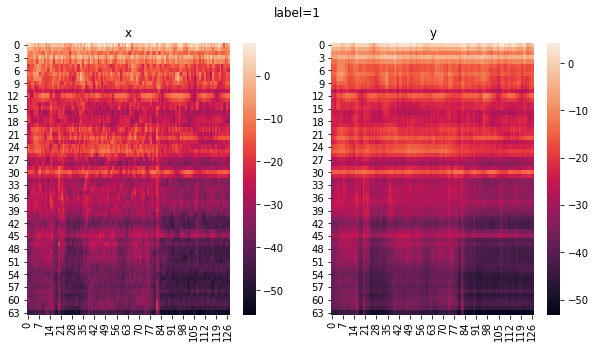

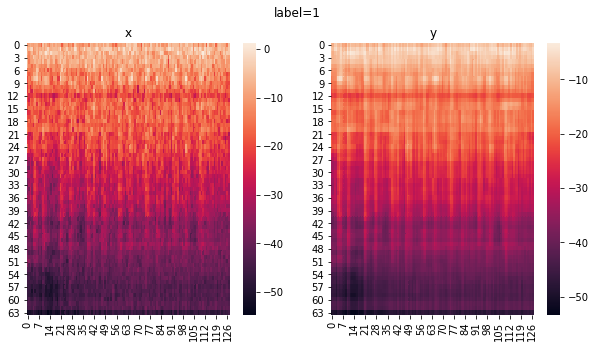

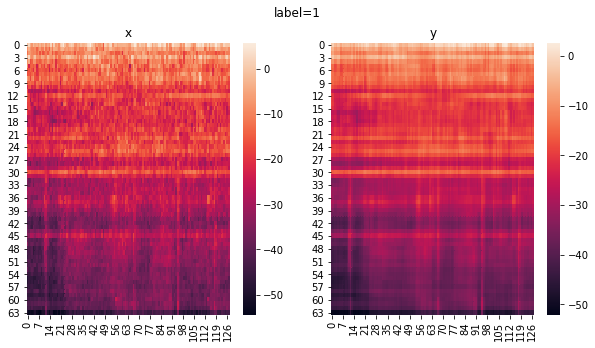

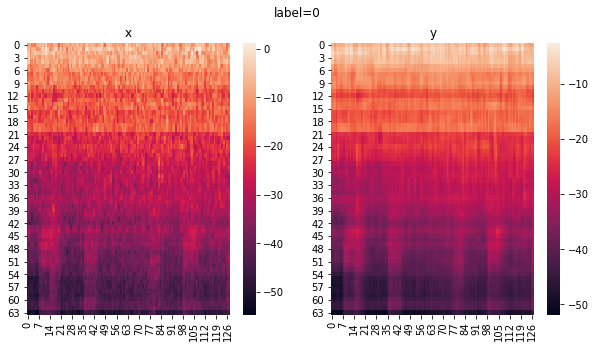

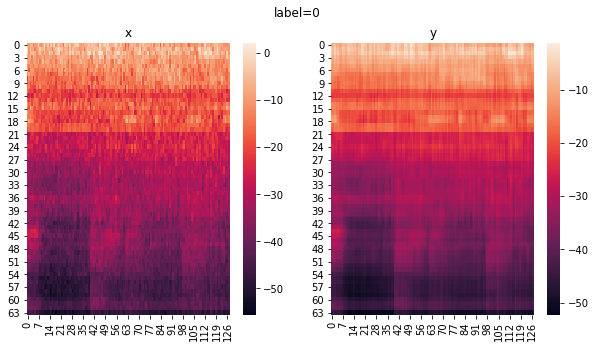

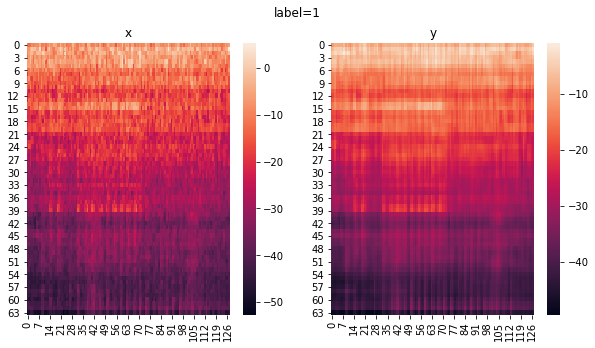

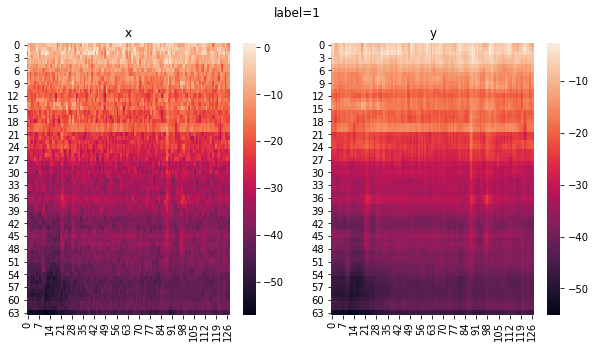

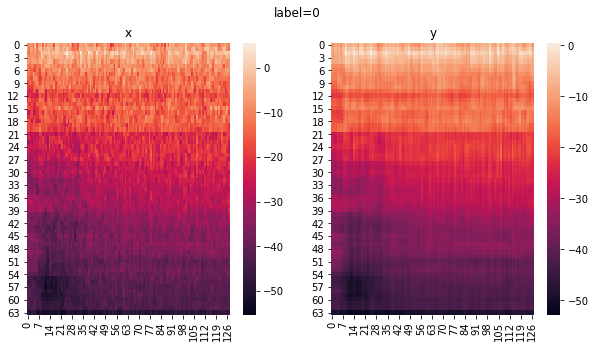

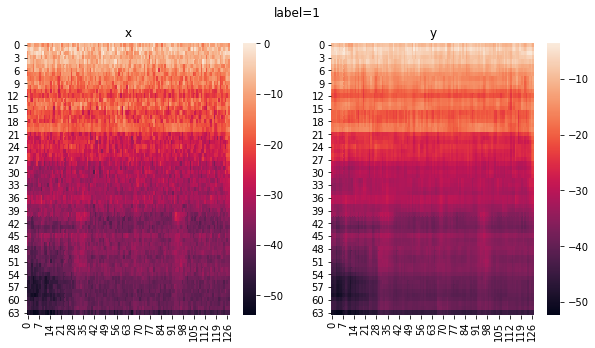

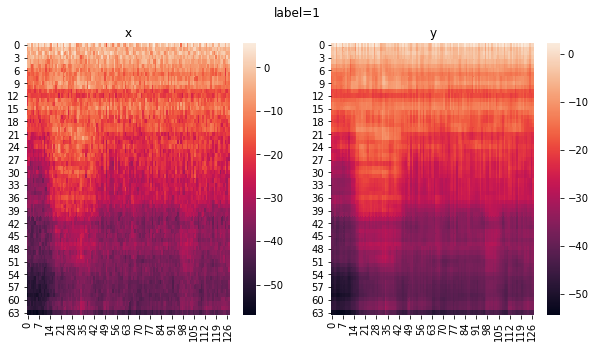

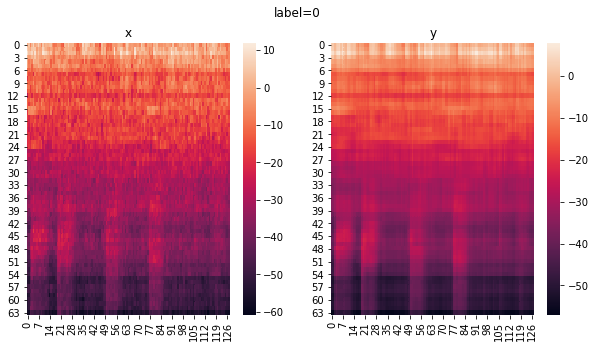

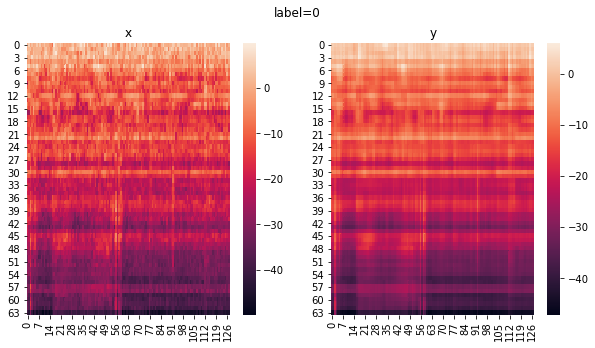

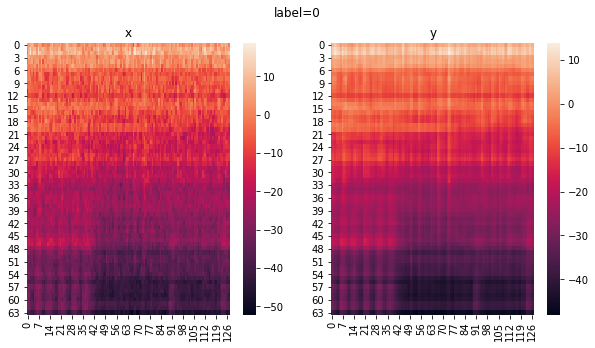

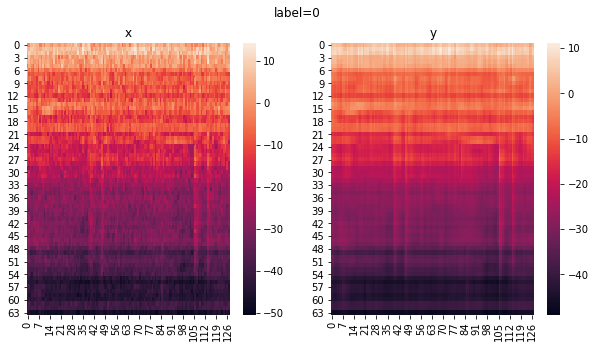

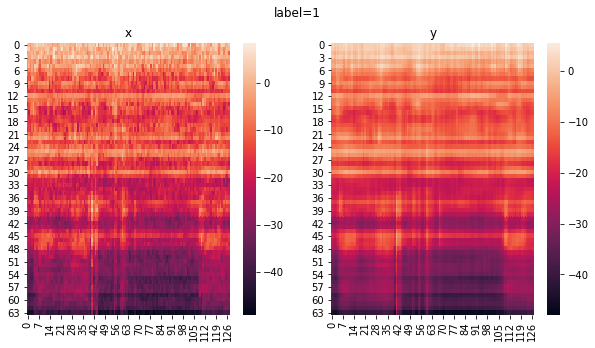

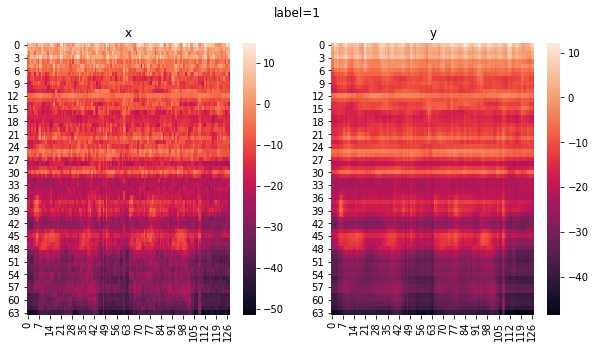

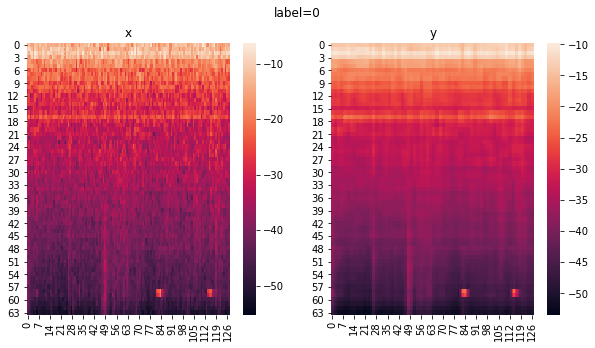

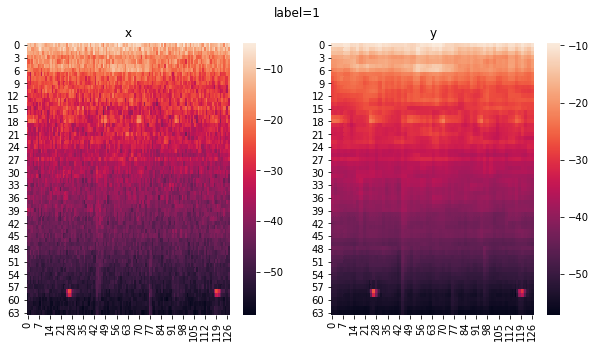

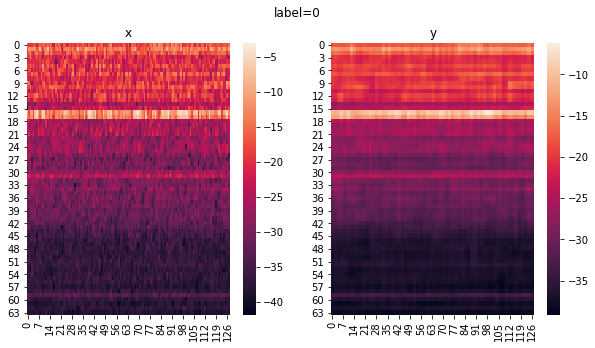

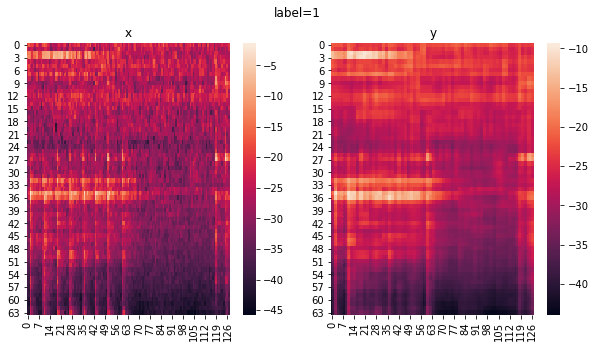

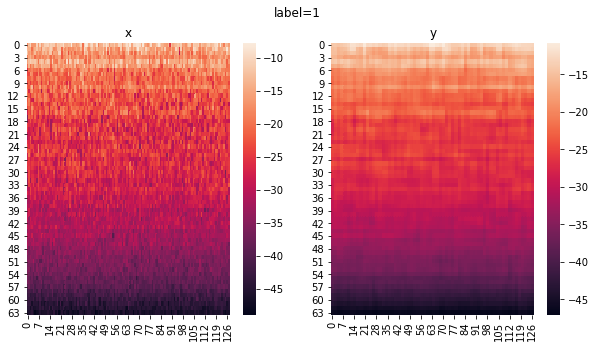

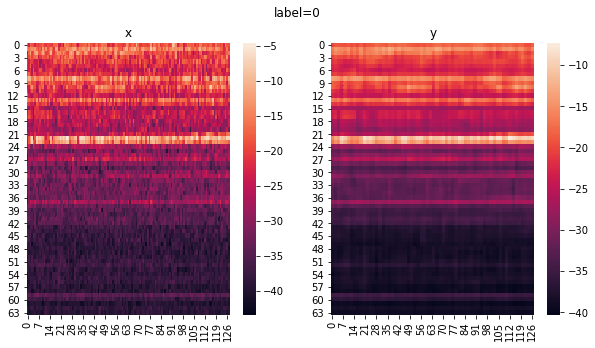

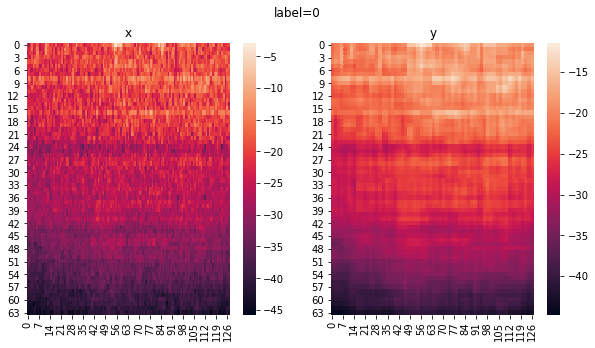

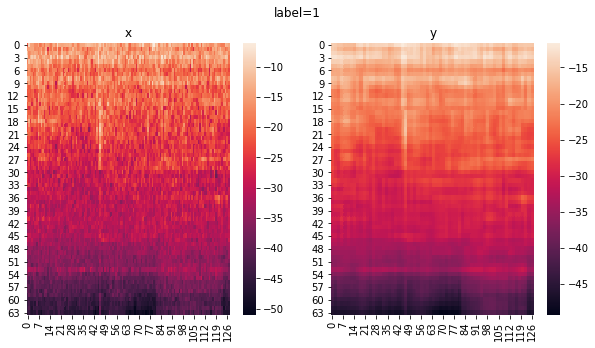

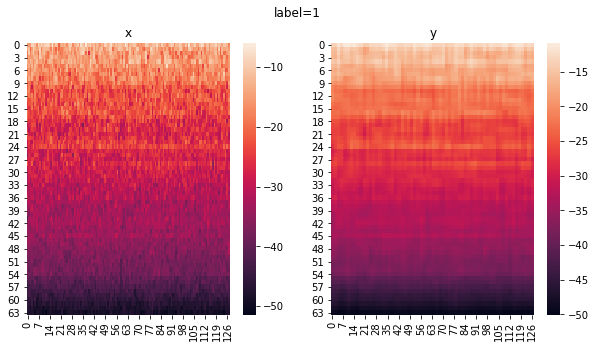

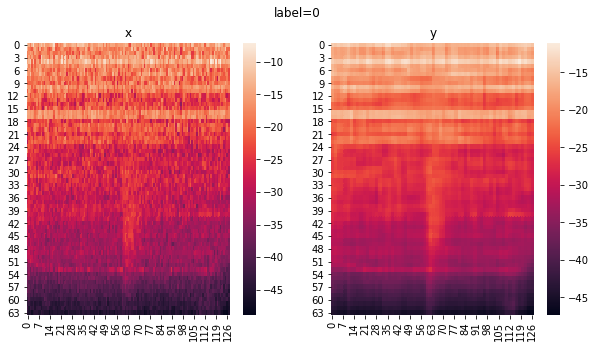

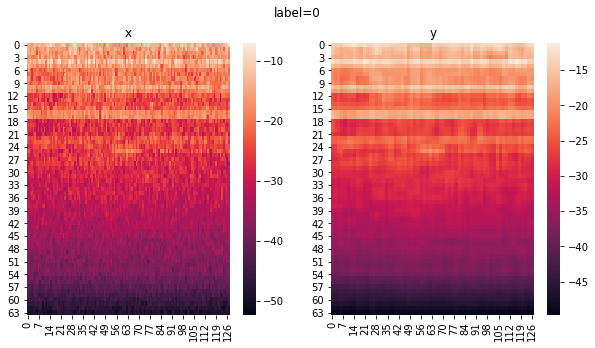

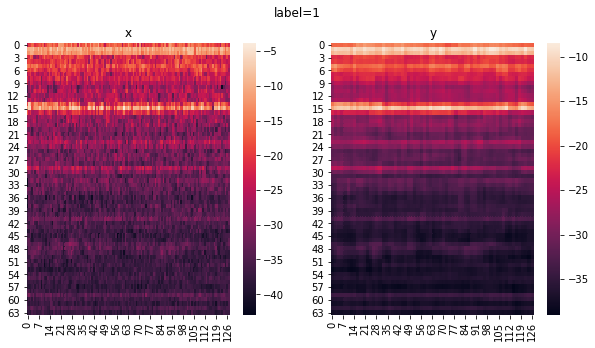

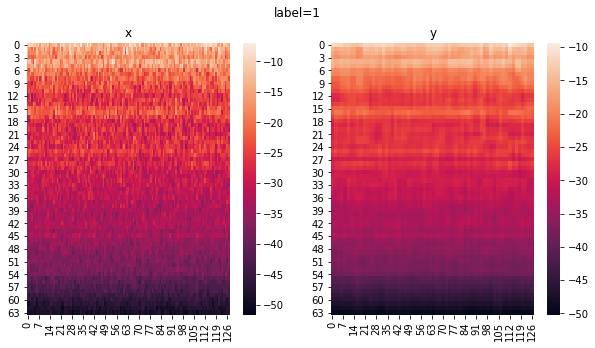

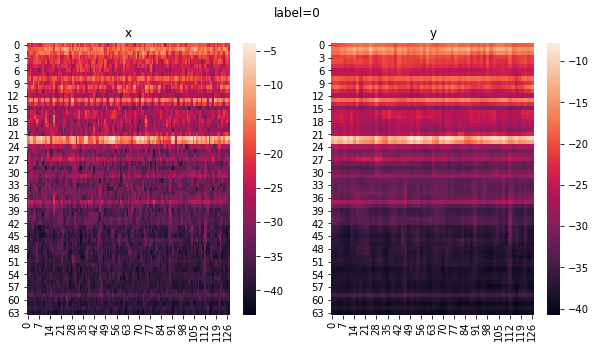

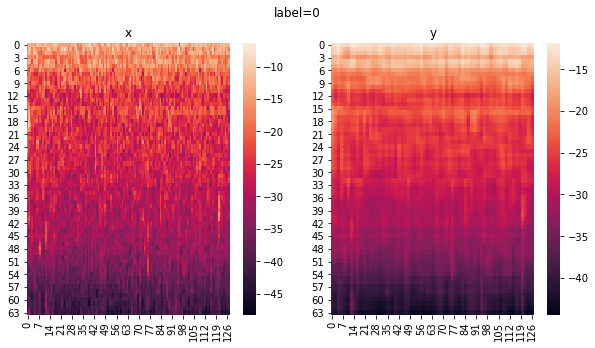

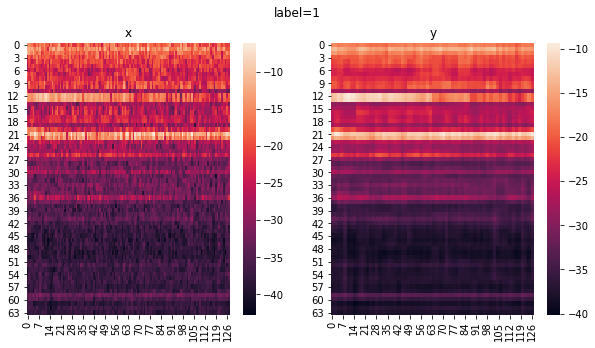

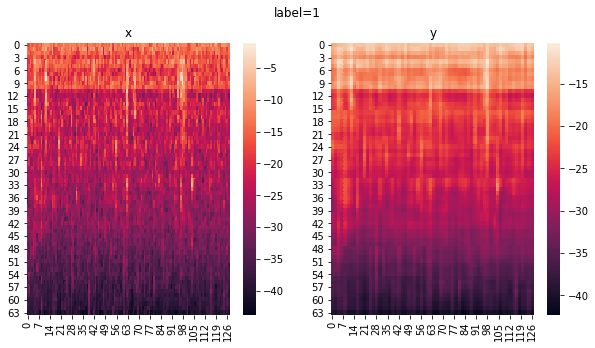

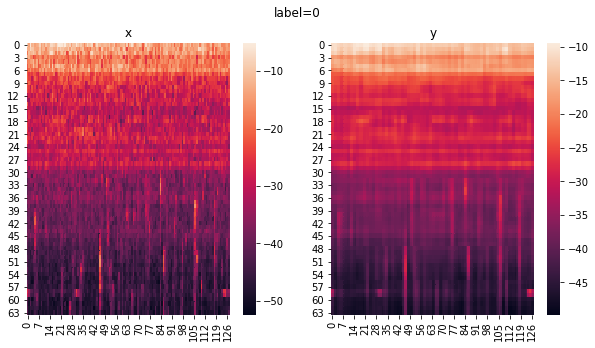

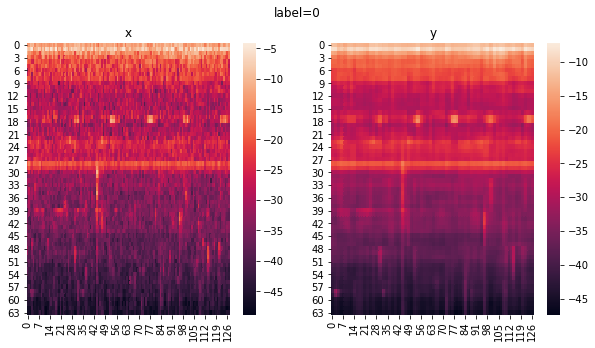

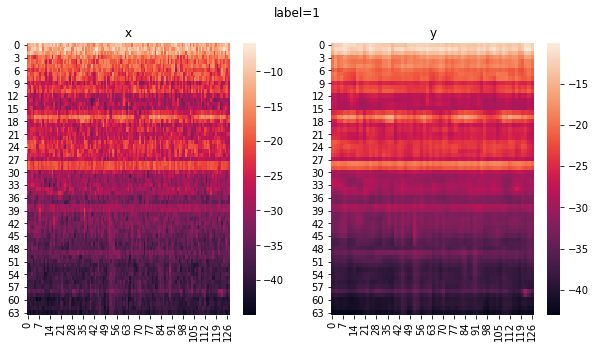

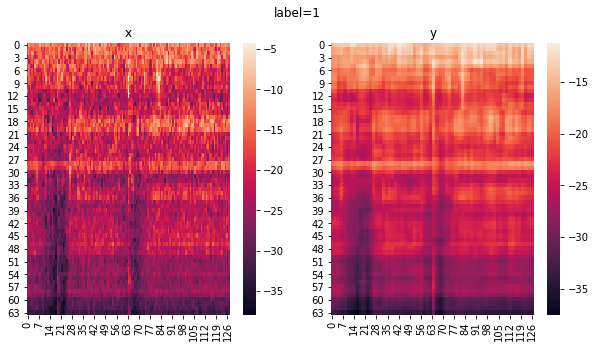

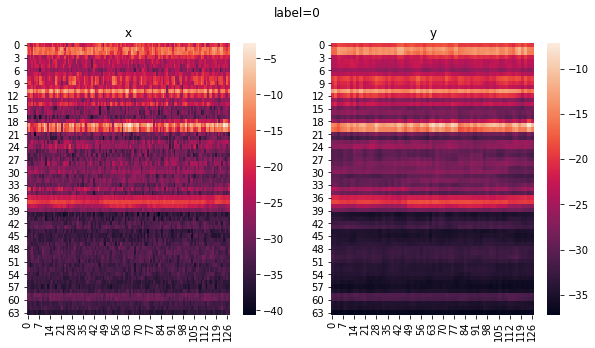

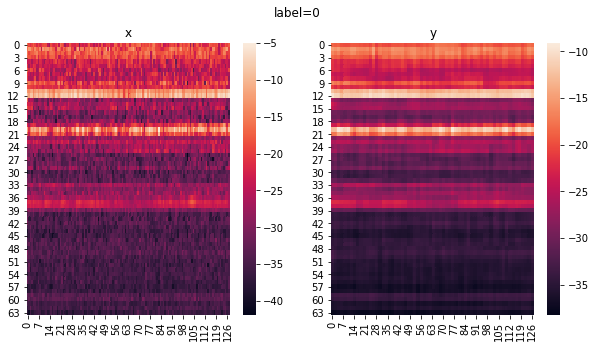

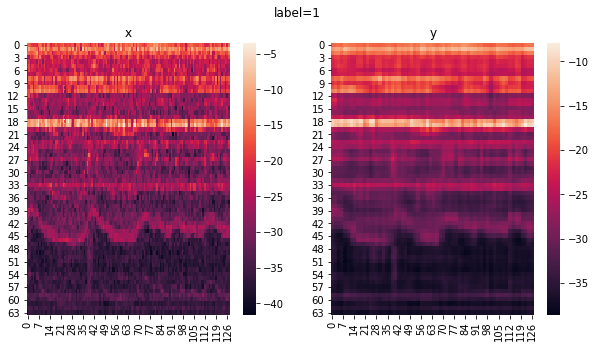

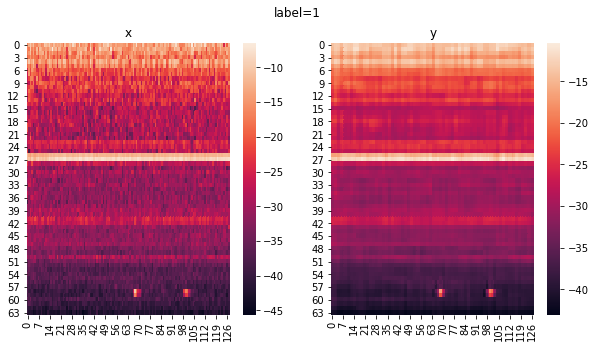

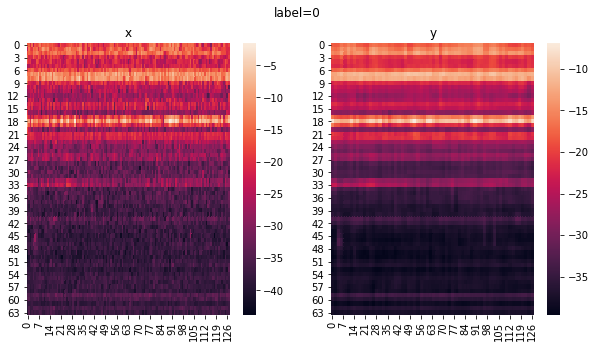

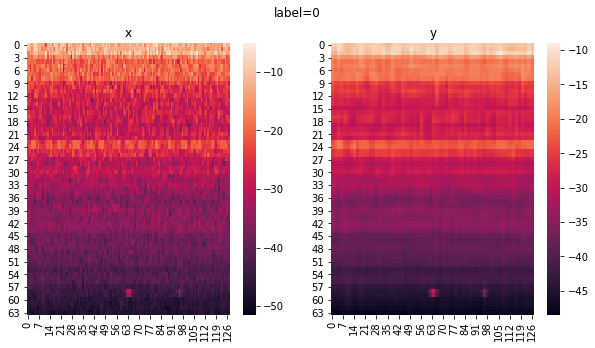

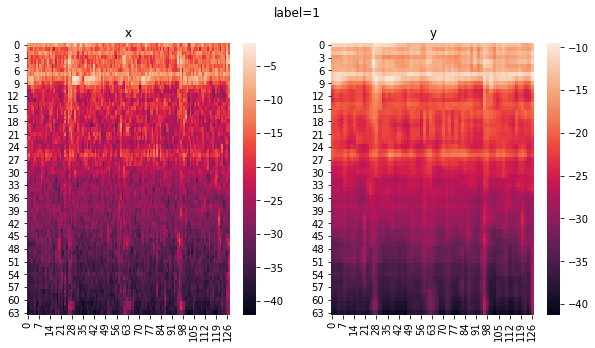

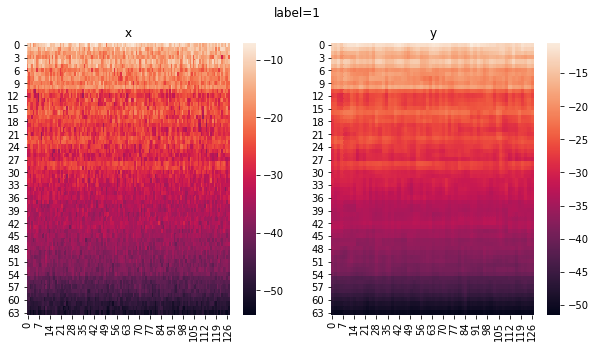

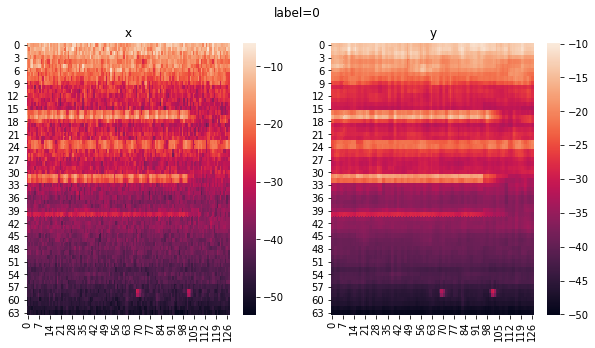

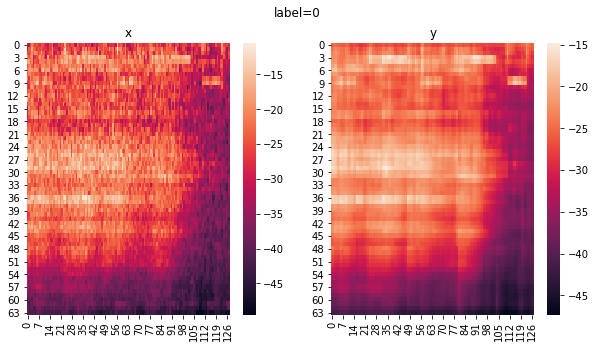

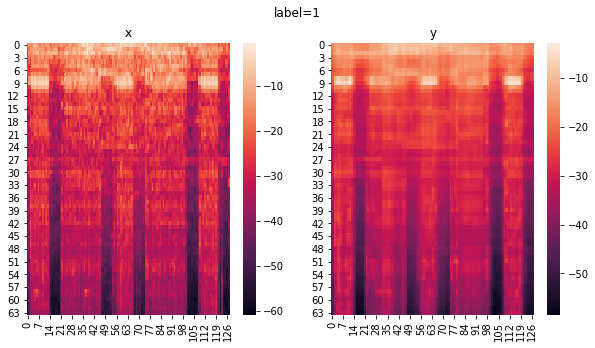

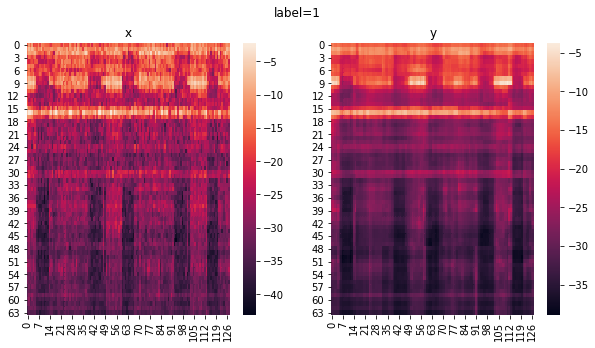

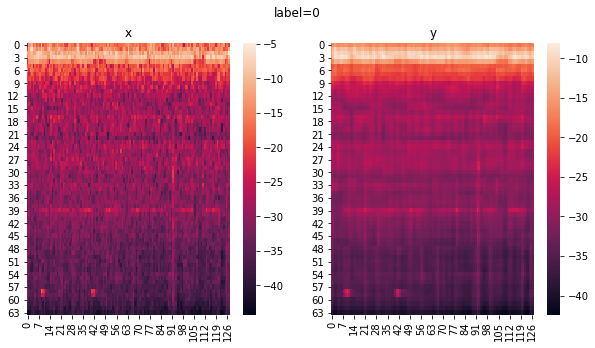

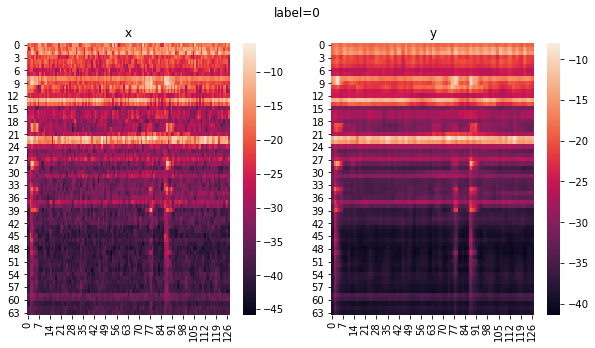

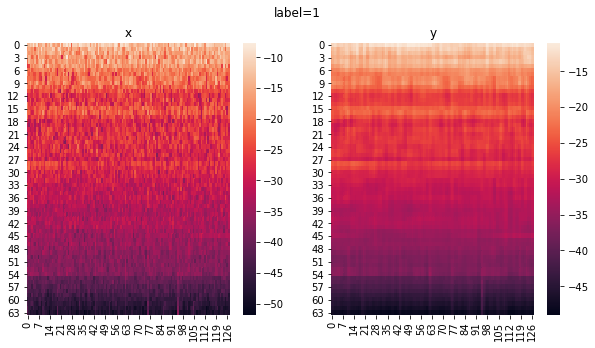

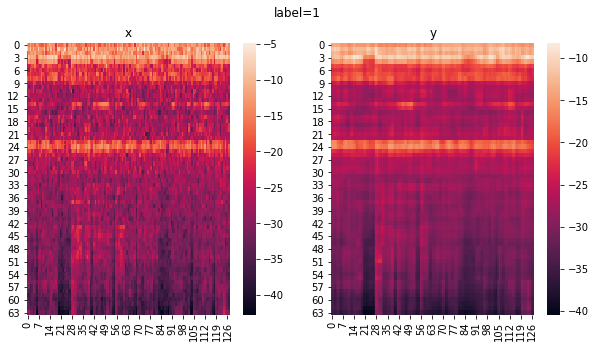

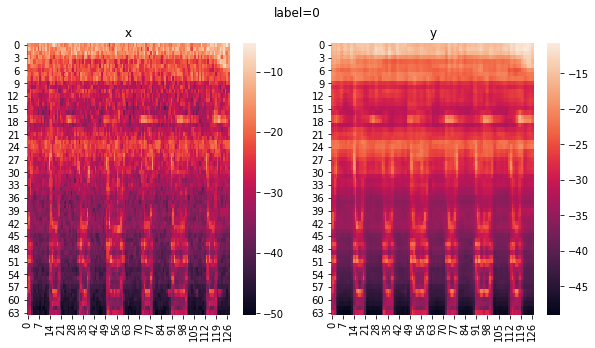

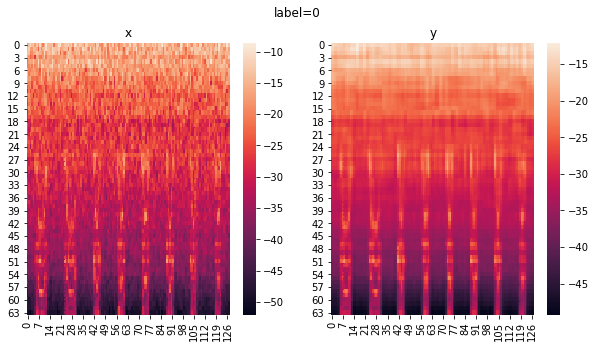

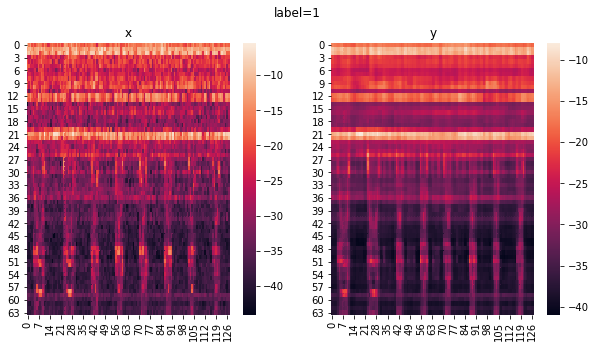

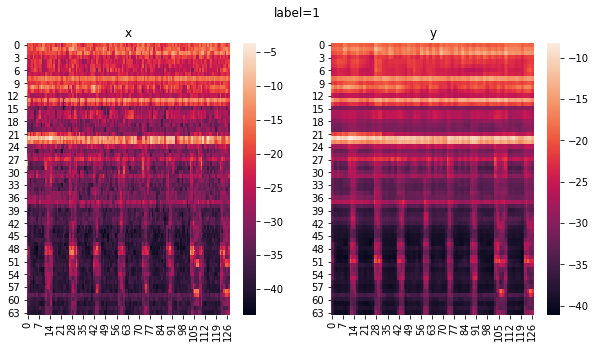

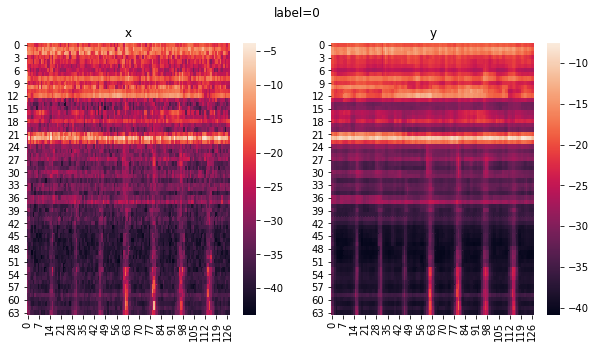

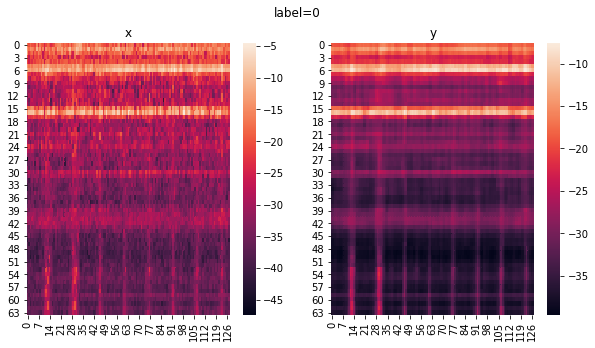

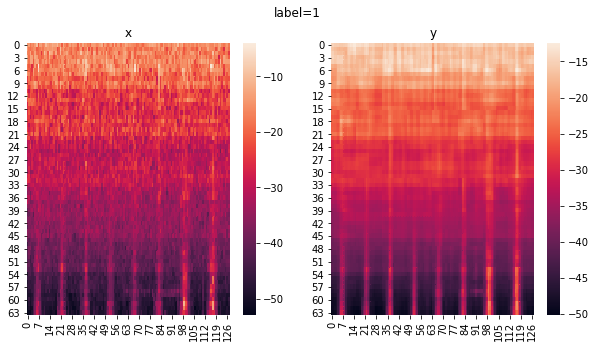

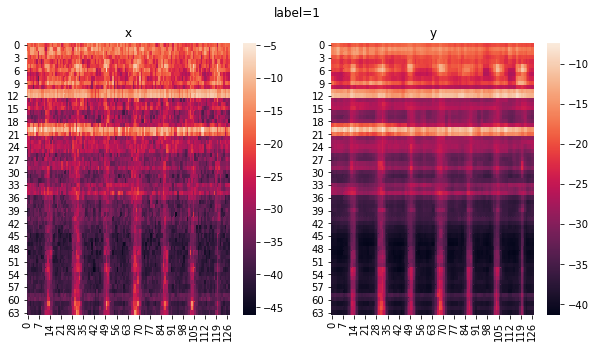

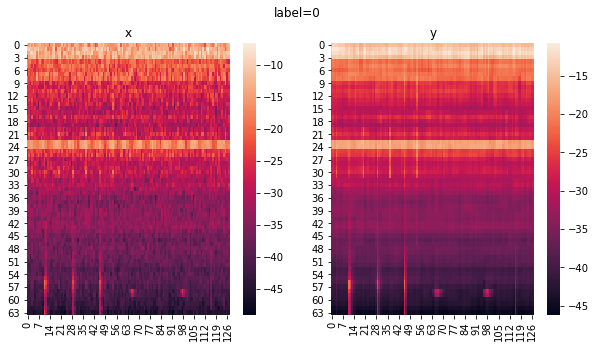

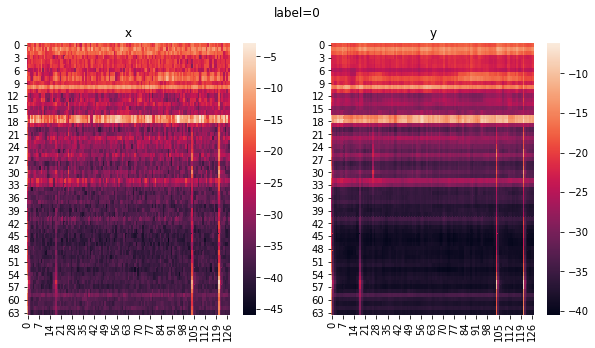

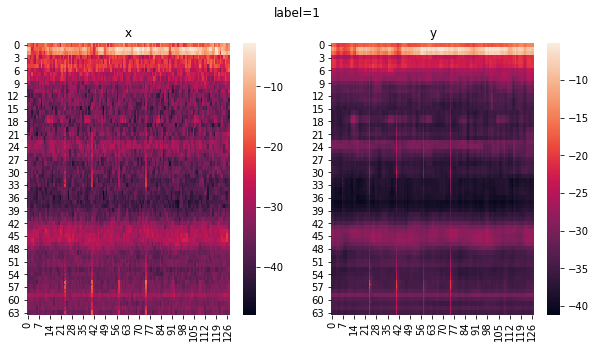

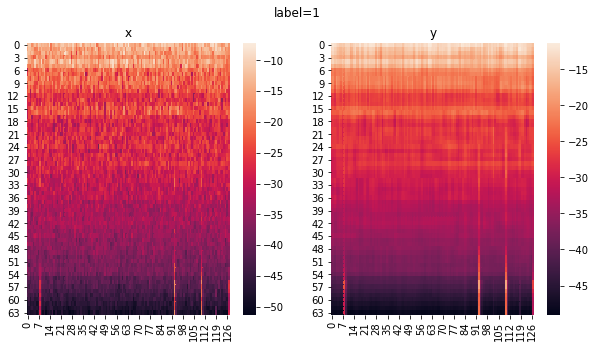

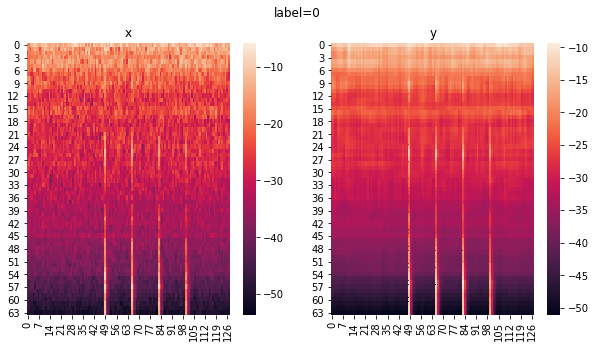

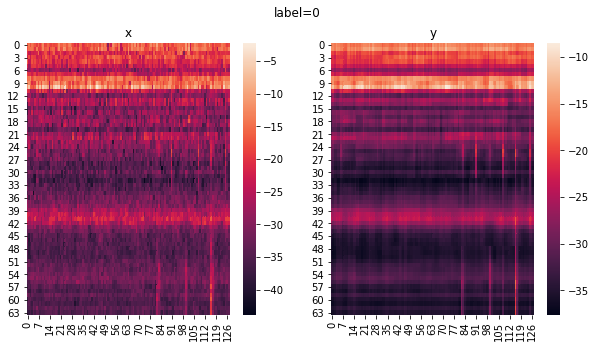

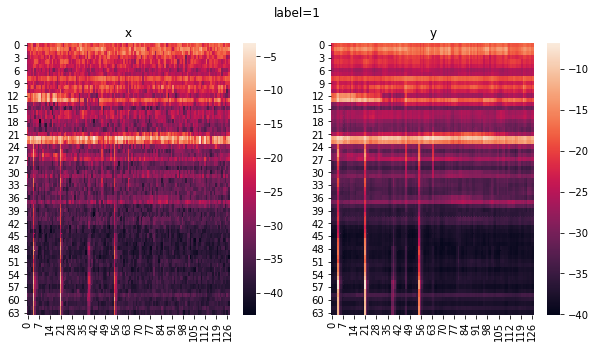

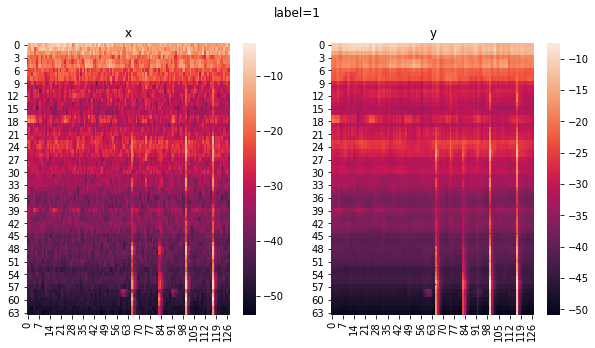

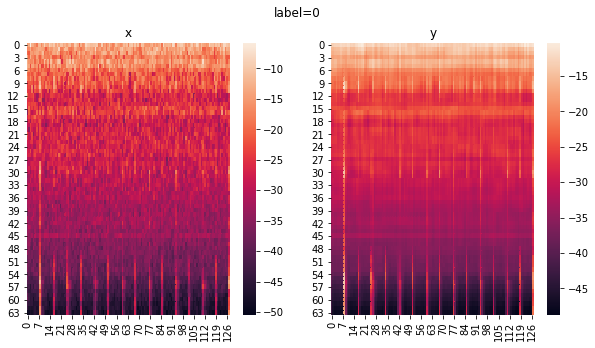

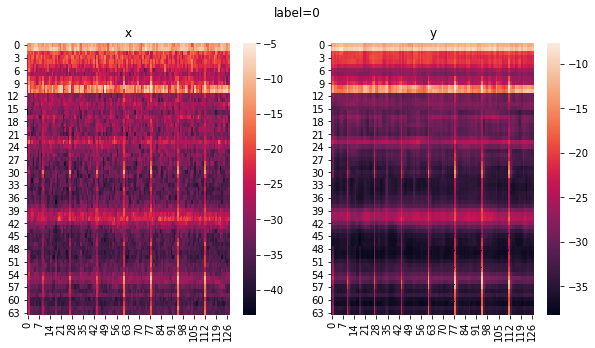

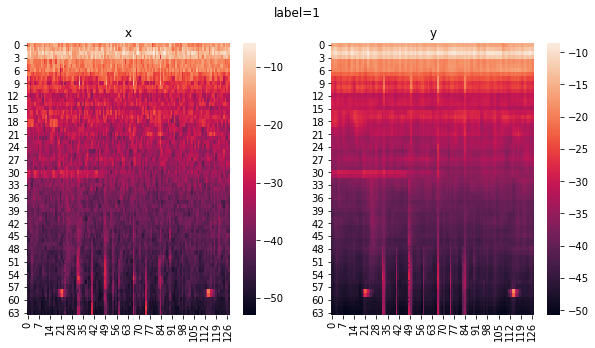

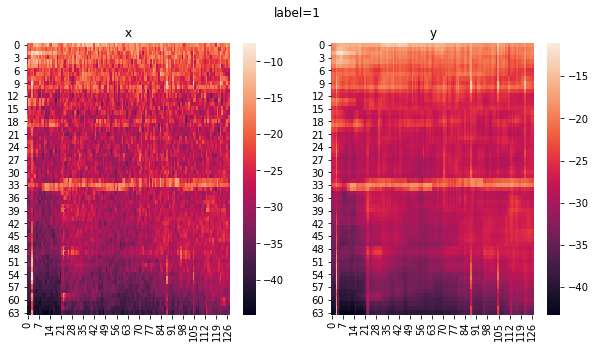

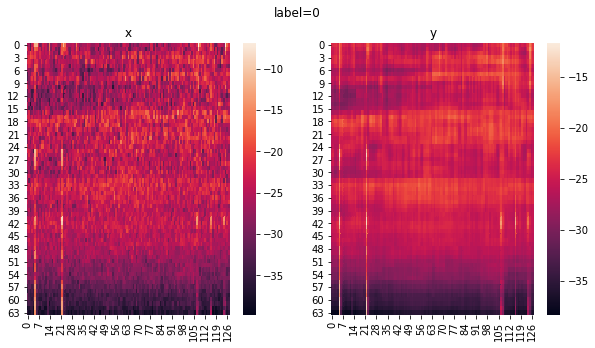

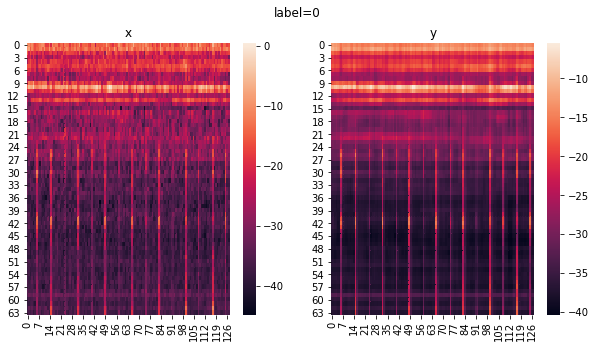

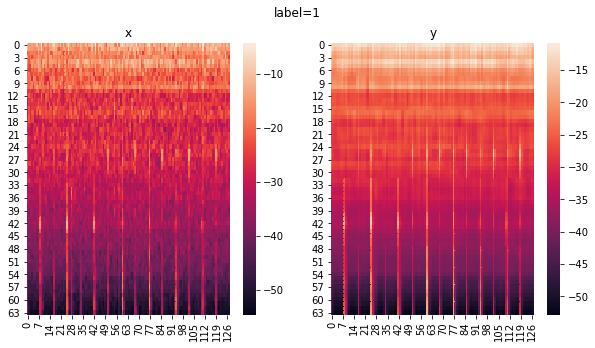

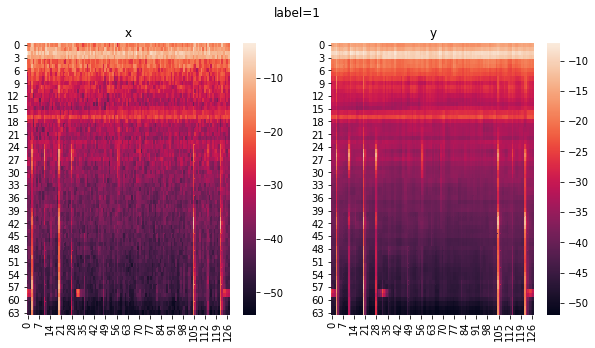

In [18]:
#def run_eval(param, mode):
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# make output result directory
os.makedirs(RESULT_DIR, exist_ok=True)

# load base directory
dirs = com.select_dirs(param=param, mode=mode)

# initialize lines in csv for AUC and pAUC
csv_lines = []


# loop of the base directory
for idx, target_dir in enumerate(dirs):
    com.logger.info("===========================")
    com.logger.info("[{idx}/{total}] {dirname}".format(
        dirname=target_dir, idx=idx+1, total=len(dirs)))

    machine_type = os.path.split(target_dir)[1]

    com.logger.info("============== MODEL LOAD ==============")

    model_file = "{model}/{machine_type}_model.pth".format(
        model=param["model_directory"],
        machine_type=machine_type)

    if not os.path.exists(model_file):
        com.logger.error("{} model not found ".format(machine_type))
        sys.exit(-1)

    # define AE model
    model = Model(sample_rate=config['preprocessing']['sample_rate'],
                  window_size=config['preprocessing']['window_size'],
                  hop_size=config['preprocessing']['hop_size'],
                  mel_bins=config['preprocessing']['mel_bins'],
                  fmin=config['preprocessing']['fmin'],
                  fmax=config['preprocessing']['fmax']).to(device)
    model.eval()
    model.load_state_dict(torch.load(model_file))

    if mode:
        # results by type
        csv_lines.append([machine_type])
        csv_lines.append(["id", "AUC", "pAUC"])
        performance = []

    machine_id_list = eval_func.get_machine_id_list_for_test(target_dir)
    recons_outpath = RECONS_OUTDIR + '/' + machine_type
    os.makedirs(recons_outpath, exist_ok=True)
    for id_str in machine_id_list:

        # load list of test files
        test_files, y_true = eval_func.test_file_list_generator(target_dir, id_str, mode)

        # setup anomaly score file path
        anomaly_score_csv = \
            "{result}/anomaly_score_{machine_type}_{id_str}.csv"\
            .format(result=param["result_directory"],
                    machine_type=machine_type,
                    id_str=id_str)
        anomaly_score_list = []

        com.logger.info(
            "============== BEGIN TEST FOR A MACHINE ID ==============")

        y_pred = [0. for k in test_files]
        anomaly_count = 0
        normal_count = 0
        for file_idx, file_path in enumerate(test_files):
            try:
                data = com.file_load(file_path)
                data = data[0]
                # reconstruction through auto encoder in pytorch
                input_data = torch.from_numpy(data).float().to(device)
                input_data = input_data.unsqueeze(0)
                with torch.no_grad():
                    output_dict = model(input_data)
                    pred = output_dict['loss'].to('cpu').detach().numpy().copy()
                    # make reconstruct_img
                    x = output_dict['x'].to('cpu')[0,:,:,0]
                    y = output_dict['y'].to('cpu')[0,:,:,0]
                    label = y_true[file_idx]
                    file_name = os.path.basename(file_path).replace('.wav', '')
                    file_name = recons_outpath + '/' + file_name
                    if int(label) == 1:
                        if anomaly_count == 1 or anomaly_count == 2:
                            make_reconstruct_img(x, y, label, file_name)
                        anomaly_count+=1
                    else:
                        if normal_count == 1 or normal_count == 2:
                            make_reconstruct_img(x, y, label, file_name)
                        normal_count+=1
                    
                y_pred[file_idx] = pred
                anomaly_score_list.append(
                    [os.path.basename(file_path), y_pred[file_idx]])
            except FileNotFoundError:
                com.logger.error("file broken!!: {}".format(file_path))

        # save anomaly score
        eval_func.save_csv(save_file_path=anomaly_score_csv,
                           save_data=anomaly_score_list)
        com.logger.info(
            "anomaly score result ->  {}".format(anomaly_score_csv))

        if mode:
            # append AUC and pAUC to lists
            auc = metrics.roc_auc_score(y_true, y_pred)
            p_auc = metrics.roc_auc_score(
                y_true, y_pred, max_fpr=config["etc"]["max_fpr"])
            csv_lines.append([id_str.split("_", 1)[1], auc, p_auc])
            performance.append([auc, p_auc])
            com.logger.info("AUC : {}".format(auc))
            com.logger.info("pAUC : {}".format(p_auc))

        com.logger.info(
            "============ END OF TEST FOR A MACHINE ID ============")

    if mode:
        # calculate averages for AUCs and pAUCs
        averaged_performance = numpy.mean(
            numpy.array(performance, dtype=float), axis=0)
        csv_lines.append(["Average"] + list(averaged_performance))
        csv_lines.append([])

if mode:
    # output results
    result_path = "{result}/{file_name}".format(
        result=param["result_directory"],
        file_name=param["result_file"])
    com.logger.info("AUC and pAUC results -> {}".format(result_path))
    eval_func.save_csv(save_file_path=result_path, save_data=csv_lines)